In [1]:
#作业1
#姓名：李彦泽
#学号：2012009
#学院：计算机科学与技术

In [25]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import pandas as pd

In [26]:
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [27]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

/tmp/ipykernel_3992/3805781226.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

In [28]:
def Get_test_train(length, data, i):
    test_data = data[i]  # 测试集
    train_data = data[:i-1]
    return train_data, test_data

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection

In [30]:
def MyKnnClassifier(data_X, data_y, neighbors):
    loo = LeaveOneOut()
    average_acc=0
    for train, test in loo.split(X,y):
        X_train, X_test, y_train, y_test = X[train], X[test],y [train], y[test]
        trainShape = X_train.shape[0]   
        testShape = X_test.shape[0]     
        testRes = []  
        acc = 0   
        for i in range(testShape):  
            # 针对测试集中每一个样本进行预测
            # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
            testDiffMat = np.tile(X_test[i],(trainShape , 1)) - X_train
            sqTestDiffMat = testDiffMat ** 2    
            # 将差异矩阵平方
            # 方差距离为方差矩阵的整行求和，是一个一位列向量
            sqTestDiffDis = sqTestDiffMat.sum(axis=1)
            testDiffDis = sqTestDiffDis ** 0.5  
            # 开方生成标准差距离
            sortIndex = np.argsort(testDiffDis)   
            # 将标准差距离按照下标排序
            labelCount = []
            for j in range(neighbors):  
                # 考察k近邻属于哪些类
                labelCount.append(y_train[sortIndex[j]][0])
            classifyRes = Counter(labelCount)    
            # 把k近邻中最多的那个标签作为分类结果
            classifyRes = classifyRes.most_common(2)[0][0]
            testRes.append(classifyRes)
            if classifyRes == y_test[i]:  
                # 分类正确则将accRate+1
                acc += 1
        average_acc+=acc
    accRate=average_acc/1593
    print('k={0}时，准确率为：{1}'.format(neighbors,accRate))
    return accRate

In [31]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，准确率为：0.9158819836785939
k=3时，准确率为：0.9190207156308852
k=5时，准确率为：0.9152542372881356


0.9152542372881356

In [32]:
# def KnnClassifier(data_X, data_y, neighbors, flag=0):
#     loo = LeaveOneOut()
#     average_acc=0
#     for train, test in loo.split(X,y):
#         X_train, X_test, y_train, y_test = X[train], X[test],y [train], y[test]
#         knn = KNeighborsClassifier(n_neighbors=neighbors)
#         knn.fit(X_train, y_train.ravel())
#         average_acc+=knn.score(X_test, y_test)
#     if flag == 1:
#         scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
#         return scores.mean()
#     return average_acc/1593

# KnnClassifier(X, y, 1)
# KnnClassifier(X, y, 3)
# KnnClassifier(X, y, 5) 

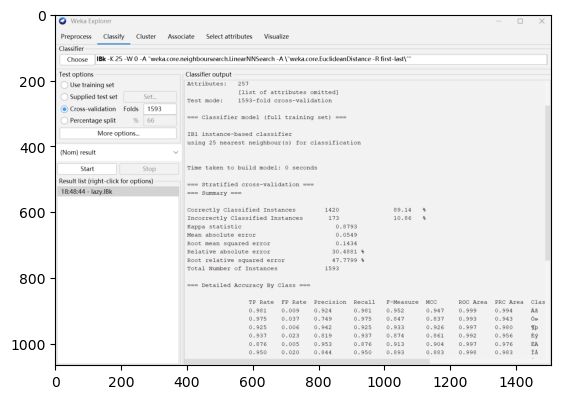

In [33]:
import matplotlib.image as mpimg
import numpy as np
#weka运行结果
I = mpimg.imread('weka.png')
plt.imshow(I)

In [34]:
scores1 = []
scores2 = []

for k in range(1,25):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    
# for k in range(1,25):
#     score2 = KnnClassifier(X, y, k, 1)
#     scores2.append(score2)

pf = pd.read_csv("all_data.csv",usecols=['scores2'])
col = pf["scores2"]
data = np.array(col)
#将weka的数据进行导入
for k in range(1,25):
    scores2.append(data[k-1])


k=1时，准确率为：0.9158819836785939
k=2时，准确率为：0.9158819836785939
k=3时，准确率为：0.9190207156308852
k=4时，准确率为：0.9196484620213434
k=5时，准确率为：0.9152542372881356
k=6时，准确率为：0.9190207156308852
k=7时，准确率为：0.9221594475831764
k=8时，准确率为：0.9240426867545511
k=9时，准确率为：0.9234149403640929
k=10时，准确率为：0.9196484620213434
k=11时，准确率为：0.9139987445072191
k=12时，准确率为：0.9165097300690521
k=13时，准确率为：0.9171374764595104
k=14时，准确率为：0.9121155053358443
k=15时，准确率为：0.9077212806026366
k=16时，准确率为：0.9077212806026366
k=17时，准确率为：0.9052102950408035
k=18时，准确率为：0.9026993094789705
k=19时，准确率为：0.901443816698054
k=20时，准确率为：0.9008160703075957
k=21时，准确率为：0.901443816698054
k=22时，准确率为：0.903954802259887
k=23时，准确率为：0.9008160703075957
k=24时，准确率为：0.8957940991839297


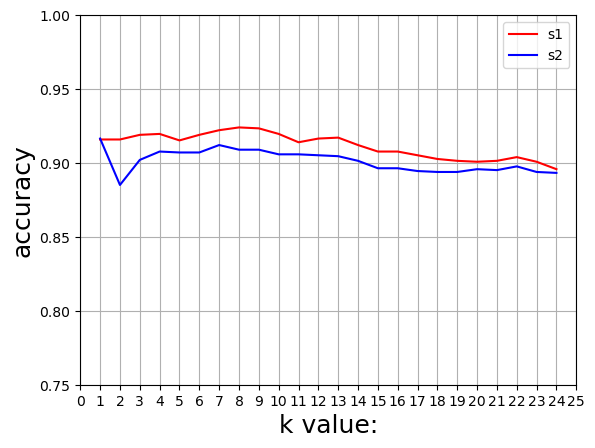

In [35]:
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 25)
plt.ylim(0.75, 1)
# 普通kNN分类精度
plt.plot(range(1,25),scores1,'r',label='s1')
plt.plot(range(1,25),scores2,'b',label='s2')
plt.legend()
plt.grid()
plt.show()